<a href="https://colab.research.google.com/github/ngzhiwei517/Sleep-Health-Analysis/blob/main/Sleep_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules**


For this notebook, we will need the following modules:

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

**Importing Sleep Health And Lifestyle dataset**

Now we will load our data set into data frames:

In [ ]:
DATA_DIR_1="https://raw.githubusercontent.com/zhiweing/WID2003-INTRO-TO-DS-/main/Sleep_health_and_lifestyle_dataset.csv"
Sleep_Health_df = pd.read_csv (DATA_DIR_1, header=0,encoding="unicode_escape")

# **Information of the Dataset**

We will get some general sight of our dataset.

In [ ]:
#show the info of the data sets
Sleep_Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **Data Cleaning**

**Check for null value**

In [ ]:
#Check for any missing values or inconsistencies in the dataset
print("Check for missing valuest\n________________________________________")
print(Sleep_Health_df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(Sleep_Health_df.shape[0], Sleep_Health_df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing valuest
________________________________________
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
________________________________________
Number of records in total: 374
Number of records that has NaN values: 219


The NaN value indicates that the person do not have any sleeping disorder (imsomnia and sleep apnae), therefore we just replace the NaN value with "No Sleep Disorder"

In [ ]:
Sleep_Health_df.fillna("No Sleep disorder", inplace=True)

**Checking for missing value after updating the dataSets**

In [ ]:
# Check for any missing values or inconsistencies in the dataset
print("Check for missing valuest\n________________________________________")
print(Sleep_Health_df.isnull().sum())
print('________________________________________\nNumber of records in total: {}\nNumber of records that has NaN values: {}'.format(Sleep_Health_df.shape[0], Sleep_Health_df.isnull().sum(axis=1).astype(bool).sum()))

Check for missing valuest
________________________________________
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
________________________________________
Number of records in total: 374
Number of records that has NaN values: 0


# **Preview of Data Frames**
We will start by previewing the first 10 rows of data frame to get an idea of the contents inside each of them.

In [ ]:

#All columns have the correct data type.
#Inspecting DataFrame
Sleep_Health_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder


In [ ]:
#It seems there are some duplicates in the DataFrame, such as in rows 7, 8 and 9.
Sleep_Health_df.iloc[7:10]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder


# **Remove Duplicates**

In [ ]:
#Find out duplicate rows
duplicated_rows = Sleep_Health_df[Sleep_Health_df.drop(columns ="Person ID").duplicated()]
duplicated_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 2 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                242 non-null    int64  
 1   Gender                   242 non-null    object 
 2   Age                      242 non-null    int64  
 3   Occupation               242 non-null    object 
 4   Sleep Duration           242 non-null    float64
 5   Quality of Sleep         242 non-null    int64  
 6   Physical Activity Level  242 non-null    int64  
 7   Stress Level             242 non-null    int64  
 8   BMI Category             242 non-null    object 
 9   Blood Pressure           242 non-null    object 
 10  Heart Rate               242 non-null    int64  
 11  Daily Steps              242 non-null    int64  
 12  Sleep Disorder           242 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 26.5+ KB


The table show that there are 242 duplicate value since it's impossible for two individuals to possess identical lifestyle, health, and demographic characteristics.We decided to create a clean copy of the dataset by removing these duplicates.


#Update Data Frame without duplicate value




1.Removes duplicate rows from the DataFrame
Sleep_Health_df

2.Show up the info of new data frame where the duplicate value have been removed



In [ ]:
#update data frame by removing duplicate value
#new data frame contain only the unique rows from the original Sleep_Health_df DataFrame
Sleep_Health_df = Sleep_Health_df.drop_duplicates(subset=Sleep_Health_df.columns[1:]).reset_index(drop=True)
Sleep_Health_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                132 non-null    int64  
 1   Gender                   132 non-null    object 
 2   Age                      132 non-null    int64  
 3   Occupation               132 non-null    object 
 4   Sleep Duration           132 non-null    float64
 5   Quality of Sleep         132 non-null    int64  
 6   Physical Activity Level  132 non-null    int64  
 7   Stress Level             132 non-null    int64  
 8   BMI Category             132 non-null    object 
 9   Blood Pressure           132 non-null    object 
 10  Heart Rate               132 non-null    int64  
 11  Daily Steps              132 non-null    int64  
 12  Sleep Disorder           132 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 13.5+ KB


In [ ]:
Sleep_Health_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep disorder
2,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
5,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder
6,11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,No Sleep disorder
7,14,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,No Sleep disorder
8,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
9,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea


Based on the new data frame we can observed that ID 5,12 and 13 have been removed.The new data frame contain only unique column.


# **Checking Values of Categorical Variables**


In [ ]:
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',  'Sleep Disorder']
for col in cat_columns:
    unique_values[col] = Sleep_Health_df[col].unique()

unique_values

{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object),
 'Sleep Disorder': array(['No Sleep disorder', 'Sleep Apnea', 'Insomnia'], dtype=object)}

It appears redundant to have separate categories for "normal" and "normal weight" within the BMI category. Additionally, in the occupation column, "Software Engineer" can be merged with "Engineer" since a software engineer is commonly considered a type of engineer. The category "Salesperson" can also be merged with "Sales Representative" within the dataset since they likely represent similar roles or occupations.Therefore, these inconsistencies require cleaning and consolidation for better clarity and coherence within the dataset.

# Removing unecessary column

Here we are removing index column since it is merely a nummber represent number of data and now even with wrong index after removing the duplicate index.

In [ ]:
Sleep_Health_df = Sleep_Health_df.drop('Person ID', axis=1)
Sleep_Health_df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep disorder
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
5,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Sleep disorder
6,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,No Sleep disorder
7,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,No Sleep disorder
8,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
9,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea


# Replace unecessary value
There seems to be a redundancy with 'Normal' and 'Normal Weight' in BMI Category: this might require cleaning.We replce Normal weight with normal this case

In [ ]:
# Replace occurrences of 'Normal Weight' with 'Normal' in the 'BMI Category' column
Sleep_Health_df['BMI Category'] = Sleep_Health_df['BMI Category'].replace({'Normal Weight': 'Normal'})

# Count the occurrences of each unique value in the 'BMI Category' column
value_counts = Sleep_Health_df['BMI Category'].value_counts()

# Convert Series to DataFrame
value_counts = value_counts.reset_index()

# Rename the columns
value_counts.columns = ['BMI Category', 'Count']

# Display the DataFrame
print(value_counts)


  BMI Category  Count
0       Normal     73
1   Overweight     52
2        Obese      7


# Occupation column analysis

In [ ]:
# Let's check the values in the Occupations column
Sleep_Health_df['Occupation'].value_counts()

Occupation
Nurse                   29
Doctor                  24
Engineer                22
Teacher                 15
Lawyer                  15
Accountant              11
Salesperson              9
Software Engineer        3
Scientist                2
Sales Representative     1
Manager                  1
Name: count, dtype: int64

# From the results, we have some considerations:
-'Saleperson' could be merged with 'Sales Representative'

-'Software Engineer' could be merged with 'Engineer'

-The 'Scientist' and 'Manager' occupations are too poorly represented in the dataset to enable significant analysis, so we decide to delete the rows related to them from the DataFrame.

In [ ]:
# Merging similar Occupations
Sleep_Health_df["Occupation"] = Sleep_Health_df["Occupation"].replace({'Sales Representative': 'Salesperson'})

Sleep_Health_df["Occupation"] = Sleep_Health_df["Occupation"].replace({'Software Engineer': 'Engineer'})

In [ ]:
# Deleting the Rows with Scientist and Manager as Occupation
index_drop = Sleep_Health_df[Sleep_Health_df['Occupation'].isin(['Manager', 'Scientist'])].index
Sleep_Health_df= Sleep_Health_df.drop(index_drop)

In [ ]:
Sleep_Health_df['Occupation'].value_counts()

Occupation
Nurse          29
Engineer       25
Doctor         24
Teacher        15
Lawyer         15
Accountant     11
Salesperson    10
Name: count, dtype: int64

# **Checking for outliers**

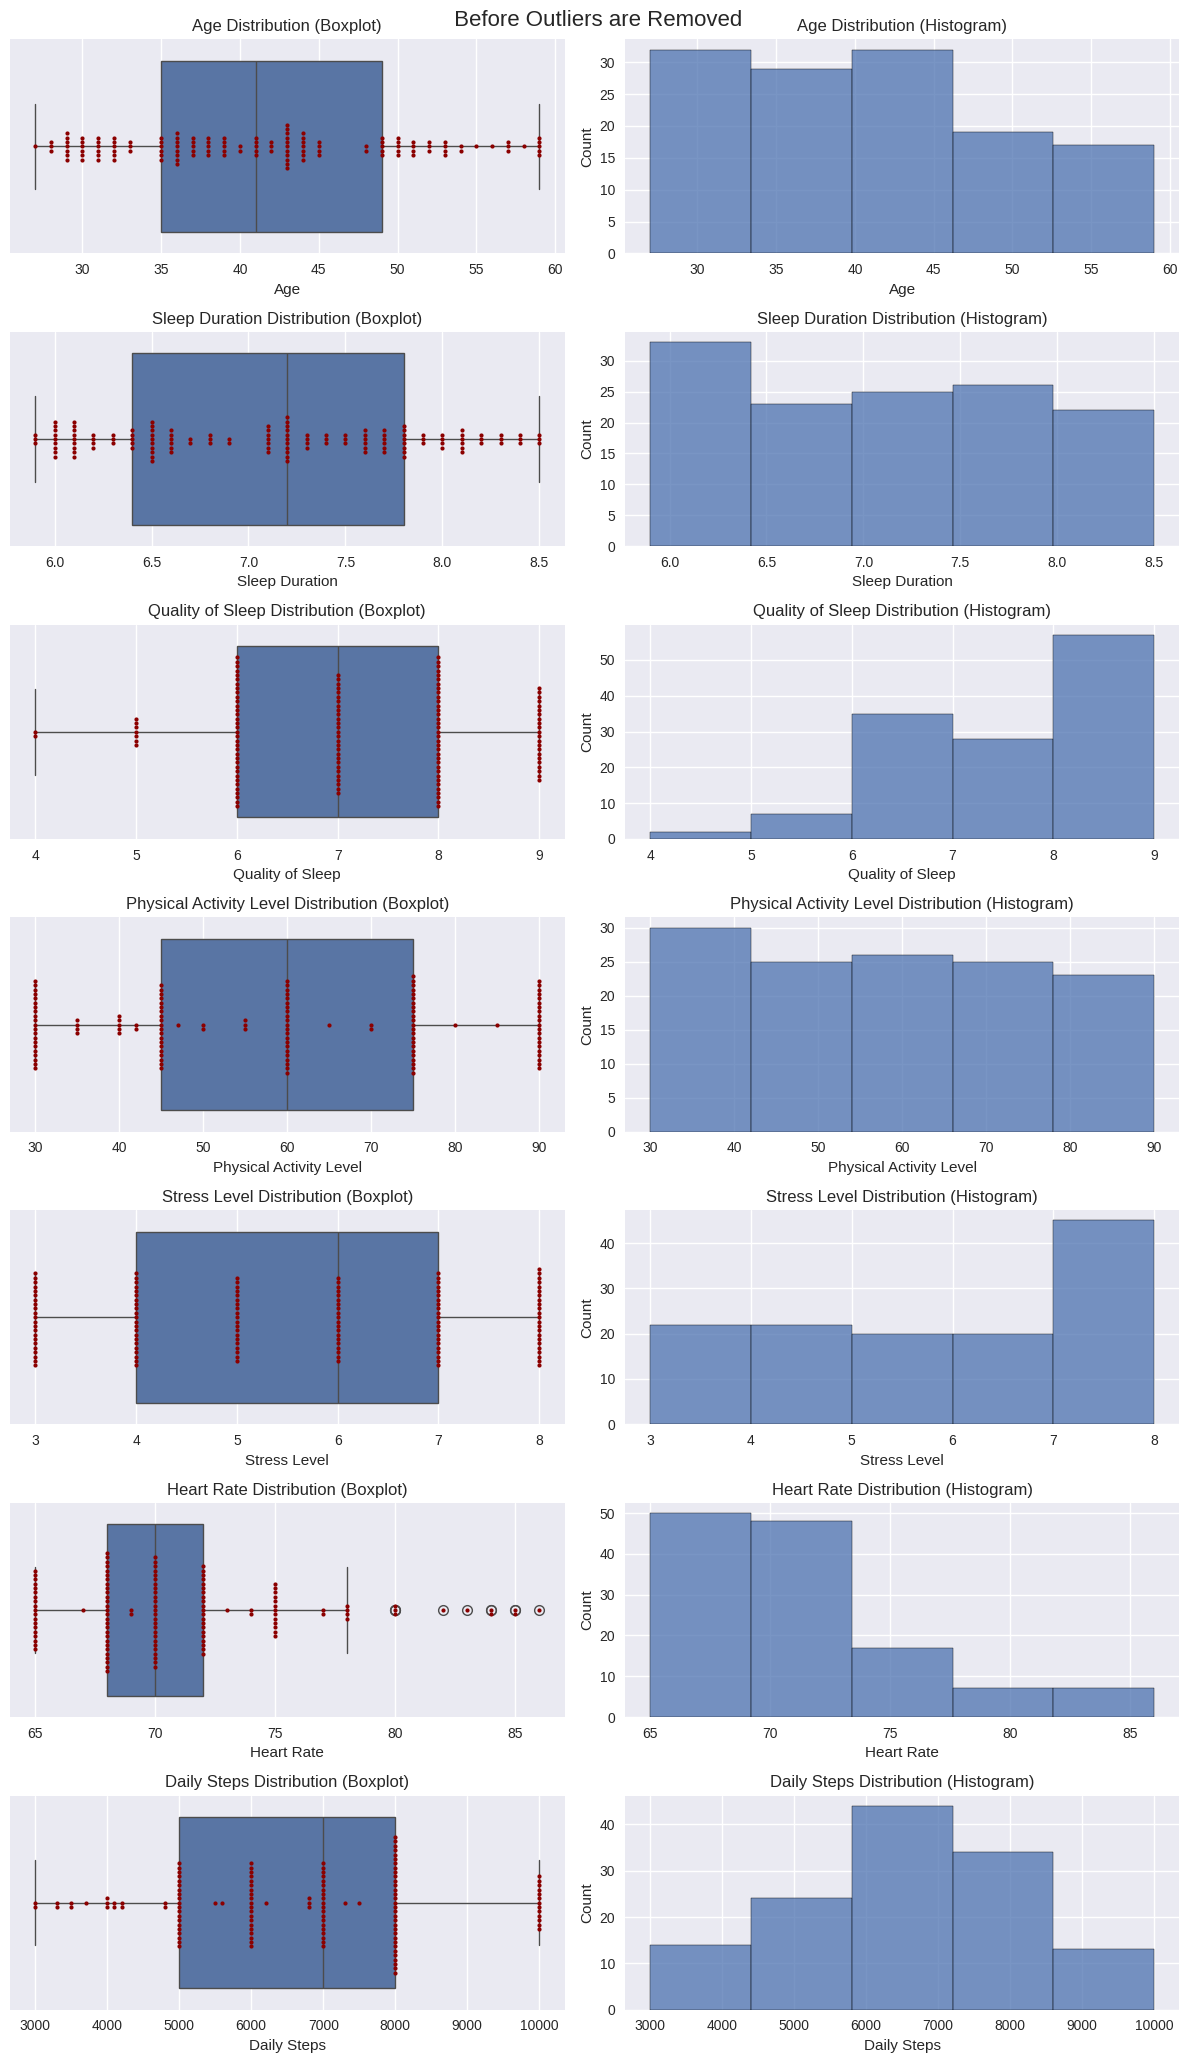

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# List of numerical columns to plot
num_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Create a 7x2 subplot
fig, axs = plt.subplots(7, 2, figsize=(12, 3 * 7))

# Title for the plots before outliers are removed
plt.suptitle(" Before Outliers are Removed", fontsize=16)

# Iterate through each numerical column
for col in num_columns:
    # Title for each subplot
    axs[num_columns.index(col), 0].set_title(col + ' Distribution (Boxplot)')
    axs[num_columns.index(col), 1].set_title(col + ' Distribution (Histogram)')

    # Swarmplot and boxplot on the left
    sns.swarmplot(data=Sleep_Health_df, x=col, s=3, color='darkred', ax=axs[num_columns.index(col), 0])
    sns.boxplot(data=Sleep_Health_df, x=col, ax=axs[num_columns.index(col), 0])

    # Histogram on the right
    sns.histplot(data=Sleep_Health_df, x=col, bins=5, ax=axs[num_columns.index(col), 1])

plt.tight_layout()
# Show the plots
plt.show()


Based on the boxplot,we can clearly see that the only metric that have outliers is heart rate.But,according to  Edward R. Laskowski, M.D. ,a normal resting heart rate for adults ranges from 60 to 100 beats per minute.So,it within the normal range and we didnt explicitly remove it.

# **Exploratory Data Analysis**

# **General View**

In [ ]:
# Descriptive Statistics
Sleep_Health_df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,41.217054,7.100775,7.186047,58.689922,5.519380,71.062016,6666.666667
std,8.858225,0.771818,1.248546,20.557769,1.745981,4.814938,1776.422552
min,27.000000,5.900000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5000.000000
50%,41.000000,7.200000,7.000000,60.000000,6.000000,70.000000,7000.000000
75%,49.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


The descriptive statistics provide the following insights:

– The average age of individuals in the dataset is approximately 41 years, with a minimum of 27 and a maximum of 59 years.

– The average sleep duration is approximately 7.1 hours, with a minimum of 5.8 and a maximum of 8.5 hours.

– The average quality of sleep rating is 7.2 on a scale of 1 to 10, with a minimum of 4 and a maximum of 9.

– The average physical activity is 58 minutes per day.

– The average stress level is around 5.5 on a scale of 1 to 10.

– The average heart rate is approximately 71 beats per minute.

– The average number of daily steps is around 6,600.

# Occupation View
count of occupation

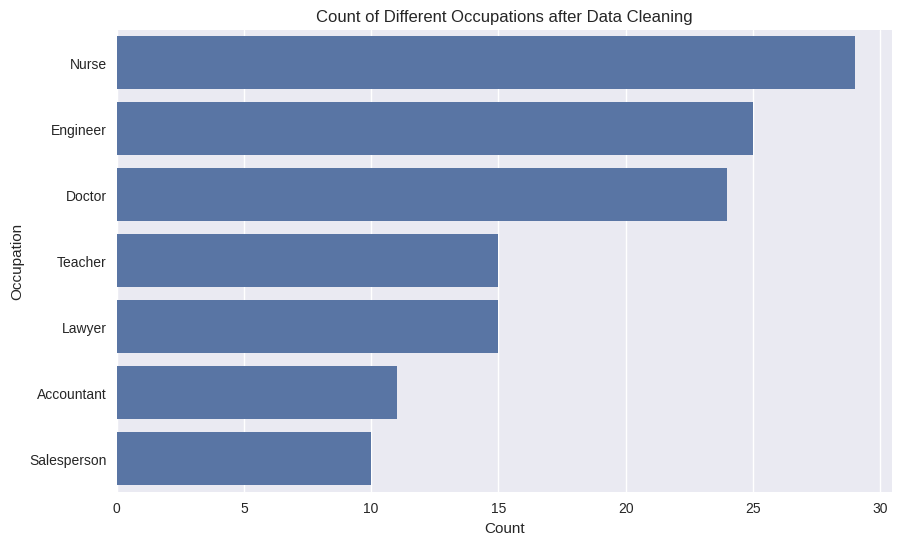

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of each occupation after data cleaning
occupation_counts_cleaned = Sleep_Health_df['Occupation'].value_counts()

# Sort the occupations based on their counts in ascending order
sorted_occupations_cleaned = occupation_counts_cleaned.index.tolist()

# Plotting count of different occupations after data cleaning
plt.figure(figsize=(10, 6))
sns.countplot(y="Occupation", data=Sleep_Health_df, order=sorted_occupations_cleaned)
plt.title("Count of Different Occupations after Data Cleaning")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()


# Relationship between occupation, stress and quality of sleep

In [ ]:
# Calculate the mean stress level by occupation
stress_by_occupation = Sleep_Health_df.groupby('Occupation')['Stress Level'].mean().reset_index()

# Display the result
print(stress_by_occupation)

    Occupation  Stress Level
0   Accountant      4.818182
1       Doctor      6.541667
2     Engineer      4.480000
3       Lawyer      5.133333
4        Nurse      5.758621
5  Salesperson      7.100000
6      Teacher      5.000000


Baesd on the table,Enginer,Teachers and Accountant seems to have lesser stress level when compared to Salespersons,Doctor and Nurse


Find out the relationship between stress and occupation

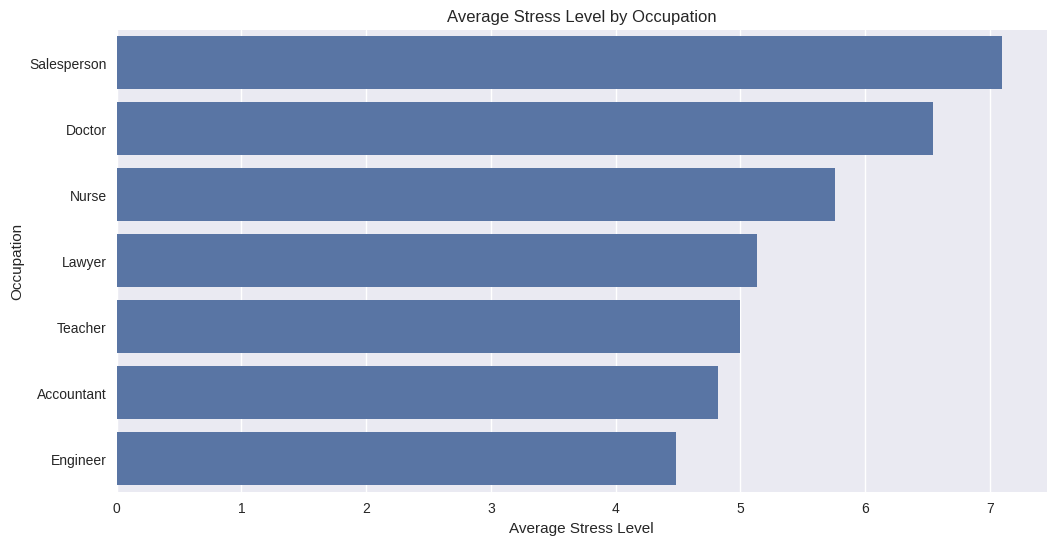

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plotting the barplot
sns.barplot(x='Stress Level', y='Occupation', data=stress_by_occupation.sort_values('Stress Level', ascending=False))

# Set title and labels
plt.title('Average Stress Level by Occupation')
plt.xlabel('Average Stress Level')
plt.ylabel('Occupation')

# Show the plot
plt.show()

`Enginers`,`teachers` and `accountant` seems to have lesser stress level when compared to `sales representative`, `salespersons` and `scientists`. Based on this, we can analyse how stress level affect quality of sleep.

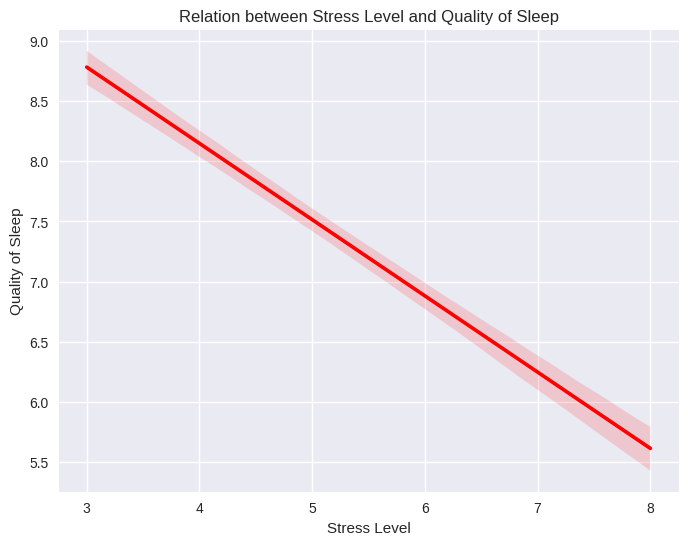

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=Sleep_Health_df, scatter=False, line_kws={'color':'red'})
plt.title('Relation between Stress Level and Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()


We notice a significant **negative correlation between stress levels and the quality of sleep**. This finding isn't particularly surprising because a negative relationship suggests that when stress levels are high, individuals may struggle to fall asleep, experience more frequent awakenings during the night, or generally have disrupted and poorer sleep quality

In [ ]:
# Check the number of occurrences of each unique value in the "Sleep Disorder" column
print(Sleep_Health_df["BMI Category"].value_counts())


BMI Category
Normal        73
Overweight    49
Obese          7
Name: count, dtype: int64


# Relationship between BMI and quality of sleep

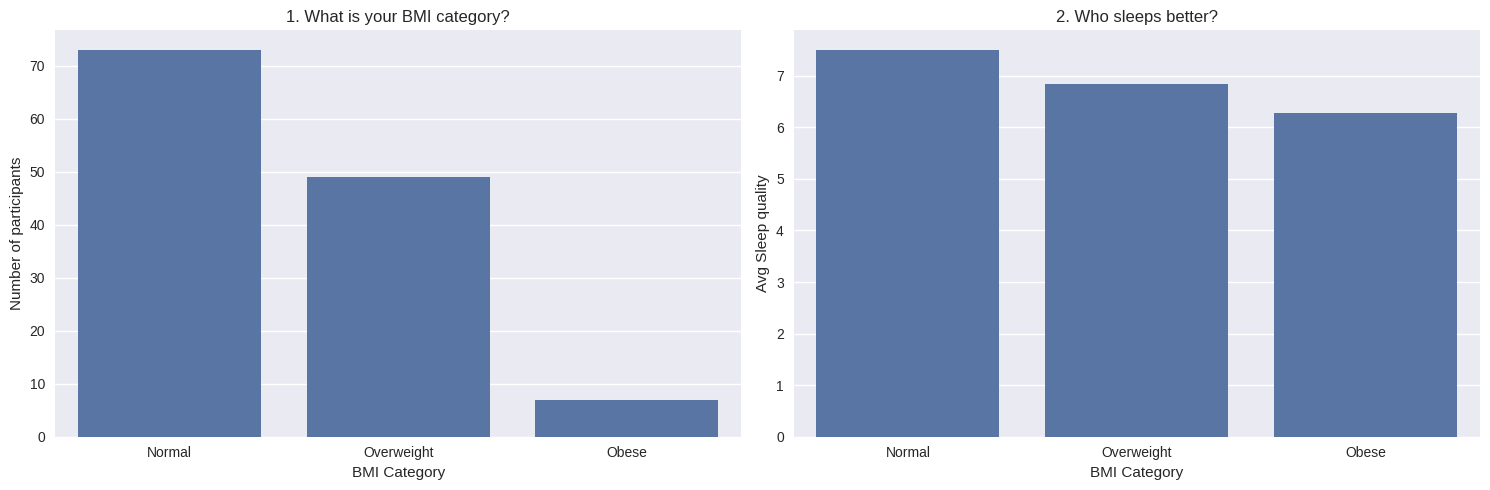

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

categoria_ordine_sleep_disorders = ["Normal", "Overweight", "Obese"]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1
sns.countplot(data=Sleep_Health_df, order=categoria_ordine_sleep_disorders, x="BMI Category", ax=axs[0]).set_title("1. What is your BMI category?")
axs[0].set(xlabel="BMI Category", ylabel="Number of participants")

# Plot 2
sleep_disorder_quality_mean = Sleep_Health_df.groupby('BMI Category')['Quality of Sleep'].mean().reset_index()
sns.barplot(data=sleep_disorder_quality_mean, order=categoria_ordine_sleep_disorders, x="BMI Category", y="Quality of Sleep", ax=axs[1]).set_title("2. Who sleeps better?")
axs[1].set(xlabel="BMI Category", ylabel="Avg Sleep quality")

plt.tight_layout()
plt.show()


In [ ]:
sleep_quality_mean = Sleep_Health_df.groupby('BMI Category')['Quality of Sleep'].agg(mean='mean')
print(sleep_quality_mean)

                  mean
BMI Category          
Normal        7.506849
Obese         6.285714
Overweight    6.836735


The above table shows the BMI category with average sleep quality. We can also observe that based on the second bar chart, participantsnt with normal BMI have better sleep quality than those who are overweight and obese. Obese participants have the lowest average sleep quality. This implies that **higher BMI is associated with poor sleep quality**.



# Relationship between sleep disorders and quality of sleep

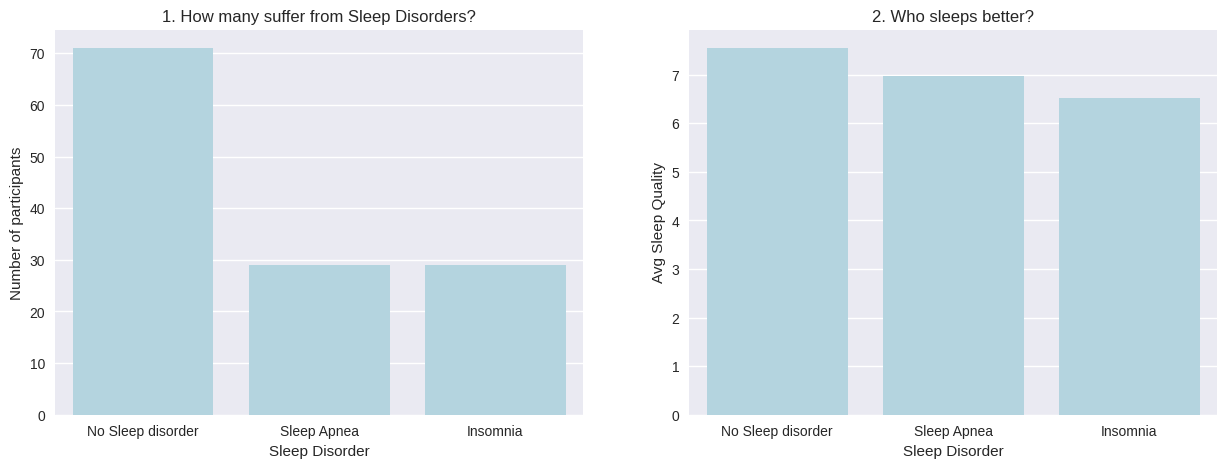

In [ ]:
# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first graph
sns.countplot(data=Sleep_Health_df, x="Sleep Disorder", color="lightblue", ax=axs[0]).set_title("1. How many suffer from Sleep Disorders?")
axs[0].set(xlabel="Sleep Disorder", ylabel="Number of participants")

# Plot the second graph
sleep_disorder_quality_mean = Sleep_Health_df.groupby('Sleep Disorder')['Quality of Sleep'].mean().sort_values(ascending=False)
sns.barplot(data=sleep_disorder_quality_mean, color="lightblue", ax=axs[1]).set_title("2. Who sleeps better?")
axs[1].set(xlabel="Sleep Disorder", ylabel="Avg Sleep Quality")

# Show the plot
plt.show()

Determine the average of sleep quality


In [ ]:
sleep_quality_stats = Sleep_Health_df.groupby('Sleep Disorder')['Quality of Sleep'].agg(mean='mean')
print(sleep_quality_stats)

                       mean
Sleep Disorder             
Insomnia           6.517241
No Sleep disorder  7.549296
Sleep Apnea        6.965517


Above table show that the sleep disorder with average sleep quality.


The first bar chart illustrate that the number of participants with different sleep disorder. While the second bar chart show that the relationship of sleep disorder with average sleep quality. Based on the first graph, we can observe that most of app users sleep normally, while **insomnia and sleep apnea are relatively less common** among the participants.

Based on second graph, we can observe that participants without any sleep disorders demonstrate the highest average sleep quality, which is expected. Interestingly, among those with sleep disorders, individuals with sleep apnea report better sleep quality compared to those with insomnia.

In [ ]:
print(Sleep_Health_df['Sleep Disorder'].unique())

['No Sleep disorder' 'Sleep Apnea' 'Insomnia']


# **Data Prepocessing**

# **Handling categorical variables**

Handling categorical data involves encoding categorical variables into numerical format, making them suitable for machine learning algorithms. Here, a technique known as label encoding to handle categorical variables. Label encoding involves converting categorical values into numerical representations by assigning a unique integer to each category.

In [ ]:
import pandas as pd

# Map values in 'Gender' column
gender_mapping = {'Male': 1, 'Female': 0}
Sleep_Health_df['Gender'] = Sleep_Health_df['Gender'].map(gender_mapping)

# Map values in 'BMI Category' column
bmi_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
Sleep_Health_df['BMI Category'] = Sleep_Health_df['BMI Category'].map(bmi_mapping)


# Map values in 'Sleep Disorder' column
sleep_disorder_mapping = {'Insomnia': 1, 'Sleep Apnea': 2, 'No Sleep disorder': 0}
Sleep_Health_df['Sleep Disorder'] = Sleep_Health_df['Sleep Disorder'].map(sleep_disorder_mapping)

# Map values in 'Occupation' column (assuming there are multiple occupation categories)
Sleep_Health_df['Occupation'] = Sleep_Health_df['Occupation'].factorize()[0]

For the 'Gender' column, we creates a dictionary gender_mapping that maps 'Male' to 1 and 'Female' to 0, and then applies the map function to replace the string values with the corresponding numerical values.

For the 'BMI Category' column, we creates a dictionary bmi_mapping that maps 'Normal' to 0, 'Overweight' to 1, and 'Obese' to 2, and then applies the map function to replace the string values with the corresponding numerical values.

For the 'Sleep Disorder' column, we creates a dictionary sleep_disorder_mapping that maps 'Insomnia' to 1, 'Sleep apnea' to 2, and 'No sleep disorder' to 0, and then applies the map function to replace the string values with the corresponding numerical values.

For the 'Occupation' column, we uses the factorize function from pandas to encode the categories as numerical values. The factorize function creates a unique integer for each unique category in the column.


**Splitting and Processing Blood Pressure Data**

In [ ]:
# Splitting and Processing Blood Pressure Data
Sleep_Health_df[['Systolic Pressure', 'Diastolic Pressure']] = Sleep_Health_df['Blood Pressure'].str.split('/', expand=True)
Sleep_Health_df = Sleep_Health_df.drop('Blood Pressure', axis=1)

In [ ]:
Sleep_Health_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,27,0,6.1,6,42,6,1,77,4200,0,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,0,125,80
2,1,28,2,5.9,4,30,8,2,85,3000,2,140,90
3,1,28,0,5.9,4,30,8,2,85,3000,1,140,90
4,1,29,3,6.3,6,40,7,2,82,3500,1,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,59,4,8.0,9,75,3,1,68,7000,0,140,95
128,0,59,4,8.1,9,75,3,1,68,7000,0,140,95
129,0,59,4,8.2,9,75,3,1,68,7000,2,140,95
130,0,59,4,8.0,9,75,3,1,68,7000,2,140,95


# **Transforming Data of Different Scale**

Here we used the Min-Max scaling that transforms the features to a fixed range, between 0 and 1. It does this by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value).

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select all numerical columns to be scaled
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Occupation', 'Sleep Disorder', 'Systolic Pressure', 'Diastolic Pressure']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the numerical columns
Sleep_Health_df[numerical_cols] = scaler.fit_transform(Sleep_Health_df[numerical_cols])

In [ ]:
Sleep_Health_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,0.00000,0.000000,0.076923,0.4,0.200000,0.6,0.5,0.571429,0.171429,0.0,0.407407,0.40
1,1,0.03125,0.166667,0.115385,0.4,0.500000,1.0,0.0,0.476190,1.000000,0.0,0.370370,0.25
2,1,0.03125,0.333333,0.000000,0.0,0.000000,1.0,1.0,0.952381,0.000000,1.0,0.925926,0.75
3,1,0.03125,0.000000,0.000000,0.0,0.000000,1.0,1.0,0.952381,0.000000,0.5,0.925926,0.75
4,1,0.06250,0.500000,0.153846,0.4,0.166667,0.8,1.0,0.809524,0.071429,0.5,0.925926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,1.00000,0.666667,0.807692,1.0,0.750000,0.0,0.5,0.142857,0.571429,0.0,0.925926,1.00
128,0,1.00000,0.666667,0.846154,1.0,0.750000,0.0,0.5,0.142857,0.571429,0.0,0.925926,1.00
129,0,1.00000,0.666667,0.884615,1.0,0.750000,0.0,0.5,0.142857,0.571429,1.0,0.925926,1.00
130,0,1.00000,0.666667,0.807692,1.0,0.750000,0.0,0.5,0.142857,0.571429,1.0,0.925926,1.00


**Feature Selection and Data Splitting**

Splitting the dataset is a process that involves dividing the dataset into two or more subsets: typically a training set and a test set. The purpose of splitting the dataset is to train the model on one subset (training set) and evaluate its performance on another subset (test set) that it hasn't seen during training.

In [ ]:
X=Sleep_Health_df.drop('Quality of Sleep',axis=1)
y=Sleep_Health_df['Quality of Sleep']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (103, 12)
X_test shape: (26, 12)
y_train shape: (103,)
y_test shape: (26,)


In [ ]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
72,0,0.46875,0.500000,0.346154,0.250000,0.8,0.5,0.619048,0.285714,1.0,0.555556,0.50
80,1,0.50000,0.000000,0.692308,1.000000,0.4,0.0,0.238095,0.714286,0.0,0.555556,0.50
49,1,0.31250,0.000000,0.730769,0.666667,0.2,0.0,0.142857,0.571429,0.0,0.185185,0.25
0,1,0.00000,0.000000,0.076923,0.200000,0.6,0.5,0.571429,0.171429,0.0,0.407407,0.40
12,1,0.09375,0.166667,0.692308,0.750000,0.6,0.0,0.238095,0.714286,0.0,0.185185,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,0.75000,0.666667,0.461538,0.416667,0.6,0.0,0.333333,0.428571,0.0,0.370370,0.35
14,1,0.09375,0.166667,0.769231,0.750000,0.6,0.0,0.238095,0.714286,0.0,0.185185,0.25
94,0,0.56250,0.500000,0.269231,0.250000,0.2,0.5,0.000000,0.428571,0.0,0.740741,0.75
53,1,0.34375,1.000000,0.538462,0.500000,0.4,0.0,0.142857,0.714286,0.0,0.555556,0.50


In [ ]:
y_train

72     0.4
80     0.8
49     0.8
0      0.4
12     0.6
      ... 
109    0.6
14     0.6
94     0.6
53     0.8
105    0.4
Name: Quality of Sleep, Length: 103, dtype: float64

# **Model Developing-Different Regression Model**

Since this is a regression model, R2 score,mean sqaure error (MSE) and root mean sqaure error(RMSE) will be used as a performance metrics.We decide to use linear regression model to predict the performance of model.After that, we used some of the recommended model which are support vector machine,decision tree and random forest to better improve the performance of the model.

# **Linear Regression-Polynomial**

Polynomial regression is a flexible regression technique used to predict sleep quality by modeling the relationship between predictor variables and the target variable.The degree of the polynomial determines the complexity of the curve, allowing for nonlinear relationships to be captured.

**Model building**

 Implements Polynomial Regression with Ridge regularization- able to capture more complex relationships in the data while also preventing overfitting

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Define polynomial degree
degree = 2

# Transform features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize Ridge regression model with regularization strength alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Train Ridge regression model
ridge_model.fit(X_train_poly, y_train)

# Predicting on the training data
y_pred_train = ridge_model.predict(X_train_poly)

# Evaluating the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)  # Calculating RMSE
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (Training): {mse_train}")
print(f"Root Mean Squared Error (Training): {rmse_train}")
print(f"R^2 Score (Training): {r2_train}")


Mean Squared Error (Training): 0.0023595748616676124
Root Mean Squared Error (Training): 0.048575455341845354
R^2 Score (Training): 0.9619933048289936


Visualizing Predictions

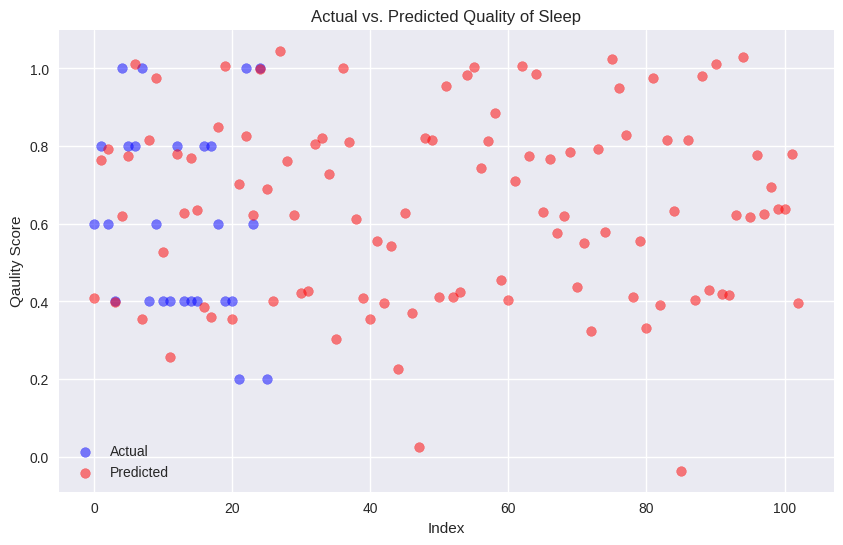

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Converting predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred_train, columns=['Predicted Quality of Sleep'])
y_test.reset_index(drop=True, inplace=True)  # Resetting index for proper concatenation

# Concatenating actual and predicted values for comparison
comparison_df = pd.concat([y_test, y_pred_df], axis=1)

# Plotting actual vs. predicted values for Sleep Health
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df.index, comparison_df['Quality of Sleep'], color='blue', label='Actual', alpha=0.5)
plt.scatter(comparison_df.index, comparison_df['Predicted Quality of Sleep'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Quality of Sleep')
plt.xlabel('Index')
plt.ylabel('Qaulity Score')
plt.legend()
plt.show()


Hyperparameter tuning of Polynomial Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

metrics = {
    'Mean Squared Error': mean_squared_error,
    'R^2 Score': r2_score
}

# Define polynomial degree
degree = 2

# Transform features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Train the Ridge model with the best parameters
best_regressor = Ridge(**best_params)
best_regressor.fit(X_train_poly, y_train)

# Make predictions on the training set
y_pred_train_ridge_tuned = best_regressor.predict(X_train_poly)

# Compute performance metrics on the training data
performance_train_ridge_tuned = {}
for metric_name, metric_func in metrics.items():
    if metric_name == 'Mean Squared Error':
        performance_train_ridge_tuned[metric_name] = metric_func(y_train, y_pred_train_ridge_tuned)
        # Additionally, compute and include RMSE
        performance_train_ridge_tuned['Root Mean Squared Error'] = np.sqrt(performance_train_ridge_tuned[metric_name])
    else:
        performance_train_ridge_tuned[metric_name] = metric_func(y_train, y_pred_train_ridge_tuned)

# Print the best hyperparameters and best score
print("\nBest Hyperparameters:")
for param_name, param_value in best_params.items():
    print("{}: {}".format(param_name, param_value))
print("Best Score: {:.5f}".format(best_score))

# Print the results
print("Tuned Polynomial Ridge Regression")
for metric_name, metric_value in performance_train_ridge_tuned.items():
    print("{}: {:.5f}".format(metric_name, metric_value))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


Best Hyperparameters:
alpha: 1.0
solver: lsqr
Best Score: 0.06645
Tuned Polynomial Ridge Regression
Mean Squared Error: 0.00236
Root Mean Squared Error: 0.04858
R^2 Score: 0.96199


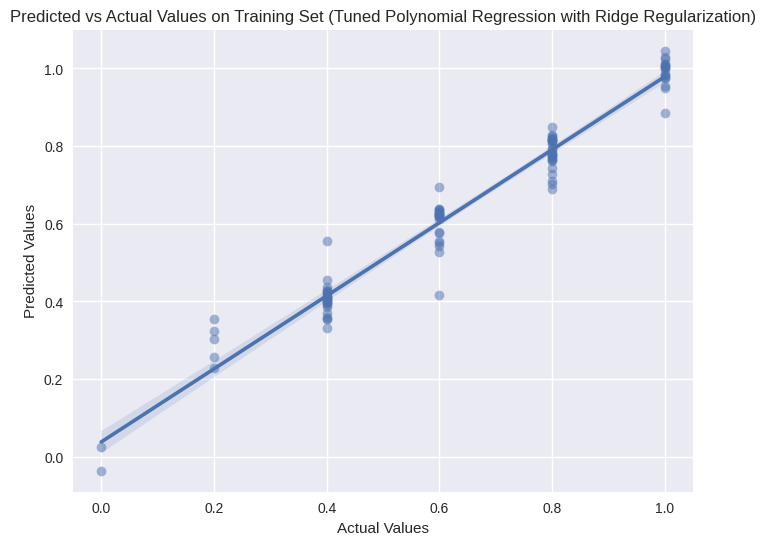

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_pred_train_ridge_tuned, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values on Training Set (Tuned Polynomial Regression with Ridge Regularization)")
plt.show()



# SVM

Model building

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Model building - Using Support Vector Regression (SVR)
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

# Predicting on the training data
y_pred_train = model.predict(X_train)

# Evaluating the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)  # Calculating RMSE
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (Training): {mse_train}")
print(f"Root Mean Squared Error (Training): {rmse_train}")
print(f"R^2 Score (Training): {r2_train}")


Mean Squared Error (Training): 0.005954647514724557
Root Mean Squared Error (Training): 0.07716636258580908
R^2 Score (Training): 0.9040859111446119


Visualisation-line plot

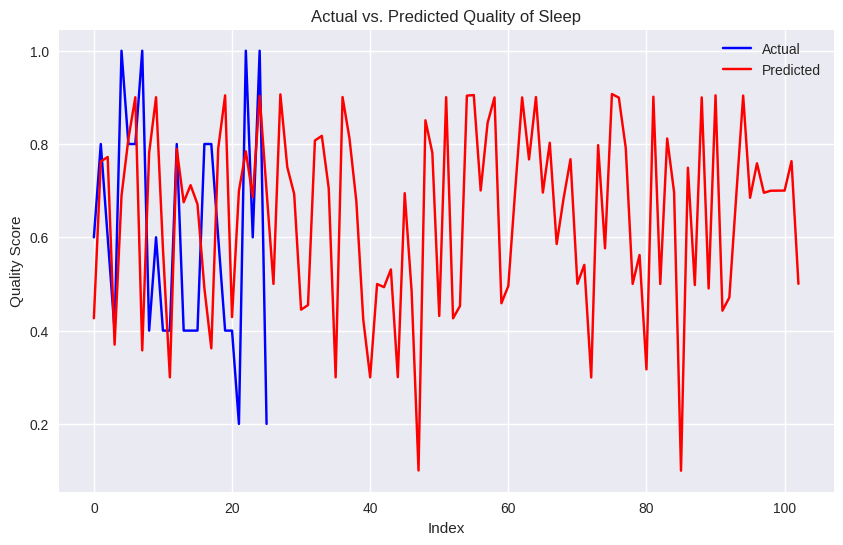

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Converting predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred_train, columns=['Predicted Quality of Sleep'])
y_test.reset_index(drop=True, inplace=True)  # Resetting index for proper concatenation

# Concatenating actual and predicted values for comparison
comparison_df = pd.concat([y_test, y_pred_df], axis=1)

# Plotting actual vs. predicted values for Quality of Sleep
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df[y_test.name], color='blue', label='Actual')
plt.plot(comparison_df.index, comparison_df['Predicted Quality of Sleep'], color='red', label='Predicted')
plt.title('Actual vs. Predicted Quality of Sleep')
plt.xlabel('Index')
plt.ylabel('Quality Score')
plt.legend()
plt.show()


hyperparameter tuning-SVR

Print the best hyperparameter and best score

In [ ]:
# Print the best hyperparameters and best score
print("\nBest Hyperparameters:")
for param_name, param_value in best_params.items():
    print("{}: {}".format(param_name, param_value))
print("Best Score: {:.5f}".format(best_score))



Best Hyperparameters:
alpha: 1.0
solver: lsqr
Best Score: 0.06645


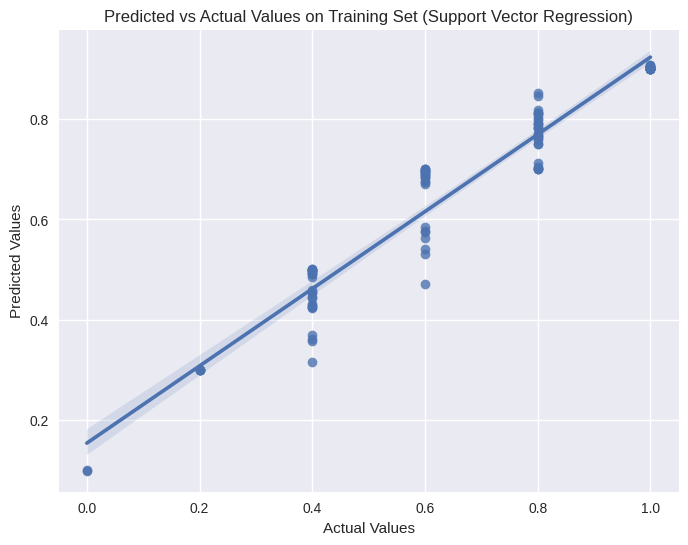

In [ ]:
from sklearn.svm import SVR

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Train an SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_svr = svr_model.predict(X_train)

# Optionally, you can tune the hyperparameters of the SVR model
# and then make predictions on the training set again
# e.g., y_pred_train_svr_tuned = tuned_svr_model.predict(X_train)

# Now you can plot the actual vs. predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_pred_train_svr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values on Training Set (Support Vector Regression)")
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only used if kernel is 'poly'
}

metrics = {
    'Mean Squared Error': mean_squared_error,
    'R^2 Score': r2_score
}

# Initialize the SVR model
regressor = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Train the SVR model with the best parameters
best_regressor = SVR(**best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_svr_tuned = best_regressor.predict(X_train)

# Compute performance metrics on the training data
performance_train_svr_tuned = {}
for metric_name, metric_func in metrics.items():
    if metric_name == 'Mean Squared Error':
        performance_train_svr_tuned[metric_name] = metric_func(y_train, y_pred_train_svr_tuned)
        # Additionally, compute and include RMSE
        performance_train_svr_tuned['Root Mean Squared Error'] = np.sqrt(performance_train_svr_tuned[metric_name])
    else:
        performance_train_svr_tuned[metric_name] = metric_func(y_train, y_pred_train_svr_tuned)

# Print the results
print("Tuned Support Vector Regression")
for metric_name, metric_value in performance_train_svr_tuned.items():
    print("{}: {:.5f}".format(metric_name, metric_value))


Tuned Support Vector Regression
Mean Squared Error: 0.00280
Root Mean Squared Error: 0.05288
R^2 Score: 0.95496


#Decision Tree Regressor

Model Building

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model building - Using Decision Tree Regressor(DTR)
dtr = DecisionTreeRegressor(max_depth=3,random_state=2529);
dtr.fit(X_train, y_train)

# Predicting on the training data
y_pred_train = dtr.predict(X_train)

# Evaluating the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)  # Calculating RMSE
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (Training): {mse_train}")
print(f"Root Mean Squared Error (Training): {rmse_train}")
print(f"R^2 Score (Training): {r2_train}")


Mean Squared Error (Training): 0.0031551296599840284
Root Mean Squared Error (Training): 0.056170540855363216
R^2 Score (Training): 0.9491789588200374


Visualisation=line plot

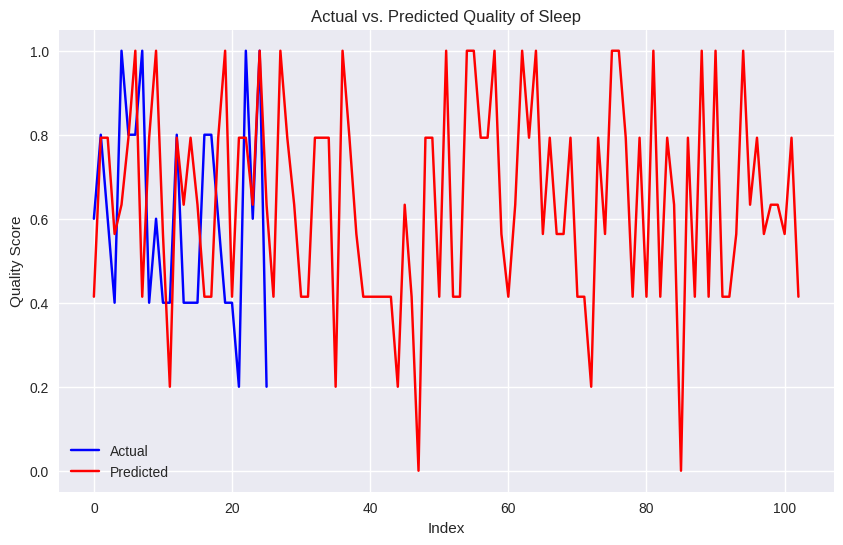

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Converting predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred_train, columns=['Predicted Quality of Sleep'])
y_test.reset_index(drop=True, inplace=True)  # Resetting index for proper concatenation

# Concatenating actual and predicted values for comparison
comparison_df = pd.concat([y_test, y_pred_df], axis=1)

# Plotting actual vs. predicted values for Quality of Sleep
plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df[y_test.name], color='blue', label='Actual')
plt.plot(comparison_df.index, comparison_df['Predicted Quality of Sleep'], color='red', label='Predicted')
plt.title('Actual vs. Predicted Quality of Sleep')
plt.xlabel('Index')
plt.ylabel('Quality Score')
plt.legend()
plt.show()

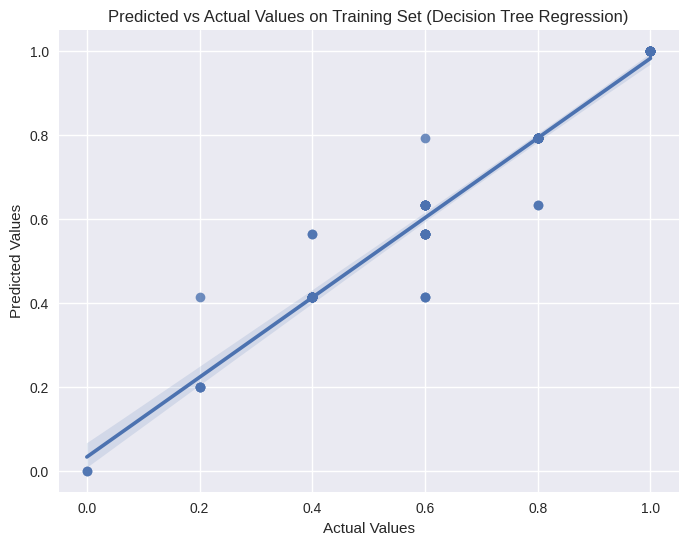

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train an DTR model
dtr_model = DecisionTreeRegressor(max_depth=3, random_state=2529)
dtr_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_dtr = dtr_model.predict(X_train)

#plot the actual vs. predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_pred_train_dtr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values on Training Set (Decision Tree Regression)")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search
param_grid = {'max_depth' : [2,3,4,5,6,7,8, 9, 10],
              'criterion' : ['squared_error'],
              'random_state' : [2529]}

metrics = {
    'Mean Squared Error': mean_squared_error,
    'R^2 Score': r2_score
}

# Initialize the DTR model
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Train the DTR model with the best parameters
best_regressor = DecisionTreeRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_dtr_tuned = best_regressor.predict(X_train)

# Compute performance metrics on the training data
performance_train_dtr_tuned = {}
for metric_name, metric_func in metrics.items():
    if metric_name == 'Mean Squared Error':
        performance_train_dtr_tuned[metric_name] = metric_func(y_train, y_pred_train_dtr_tuned)
        # Additionally, compute and include RMSE
        performance_train_dtr_tuned['Root Mean Squared Error'] = np.sqrt(performance_train_dtr_tuned[metric_name])
    else:
        performance_train_dtr_tuned[metric_name] = metric_func(y_train, y_pred_train_dtr_tuned)

# Print the results
print("Tuned Decision Tree Regressor")
for metric_name, metric_value in performance_train_dtr_tuned.items():
    print("{}: {:.5f}".format(metric_name, metric_value))


Tuned Decision Tree Regressor
Mean Squared Error: 0.00078
Root Mean Squared Error: 0.02787
R^2 Score: 0.98749


# **Random Forest Regressor**

Random forest regressor is a powerful ensemble learning algorithm that combines multiple decision trees to predict sleep quality. It works by creating a multitude of decision trees on different subsets of the data and then averaging the predictions of these individual trees to obtain the final prediction. This ensemble approach helps to reduce overfitting and improve the accuracy and generalization of the model. Random forest regressor can handle both numerical and categorical features and automatically handles feature selection and feature importance estimation.

**Model Building**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model building - Using Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting on the training data
y_pred_train = model.predict(X_train)

# Evaluating the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)  # Calculating RMSE
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (Training): {mse_train}")
print(f"Root Mean Squared Error (Training): {rmse_train}")
print(f"R^2 Score (Training): {r2_train}")


Mean Squared Error (Training): 0.0003972038834951462
Root Mean Squared Error (Training): 0.019929974498105765
R^2 Score (Training): 0.9936020648609255


**Visualizing Predictions**

In this section, we visualize the comparison between the actual and predicted values for sleep quality. Scatter plots are used to provide a clear visual comparison, helping us understand the accuracy of our model's predictions.

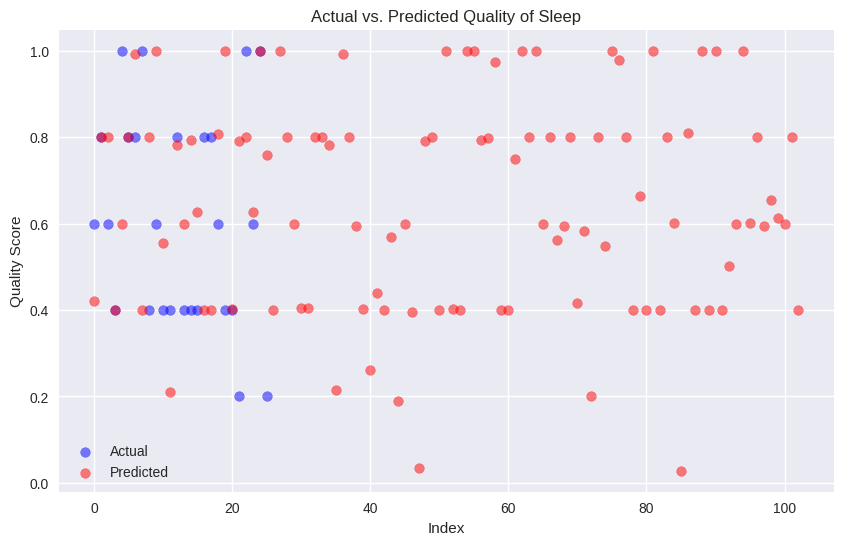

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Converting predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred_train, columns=['Predicted Quality of Sleep'])
y_test.reset_index(drop=True, inplace=True)  # Resetting index for proper concatenation

# Concatenating actual and predicted values for comparison
comparison_df = pd.concat([y_test, y_pred_df], axis=1)

# Plotting actual vs. predicted values for Quality of Sleep
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df.index, comparison_df['Quality of Sleep'], color='blue', label='Actual', alpha=0.5)
plt.scatter(comparison_df.index, comparison_df['Predicted Quality of Sleep'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Quality of Sleep')
plt.xlabel('Index')
plt.ylabel('Quality Score')
plt.legend()
plt.show()

**Hyperparameter tuning of Random Forest Regressor**

**Perform hyperparameter tuning on Random Forest Regressor model by using GridSearchCv**


Print the best hyperparameters and best score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

metrics = {
    'Mean Squared Error': mean_squared_error,
    'R^2 Score': r2_score
}

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Train the Random Forest model with the best parameters
best_regressor = RandomForestRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_train_rf_tuned = best_regressor.predict(X_train)

# Compute performance metrics on the training data
performance_train_rf_tuned = {}
for metric_name, metric_func in metrics.items():
    if metric_name == 'Mean Squared Error':
        performance_train_rf_tuned[metric_name] = metric_func(y_train, y_pred_train_rf_tuned)
        # Additionally, compute and include RMSE
        performance_train_rf_tuned['Root Mean Squared Error'] = np.sqrt(performance_train_rf_tuned[metric_name])
    else:
        performance_train_rf_tuned[metric_name] = metric_func(y_train, y_pred_train_rf_tuned)

# Print the results
print("Tuned Random Forest Regression")
for metric_name, metric_value in performance_train_rf_tuned.items():
    print("{}: {:.5f}".format(metric_name, metric_value))


# Print the best hyperparameters and best score
print("\nBest Hyperparameters:")
for param_name, param_value in best_params.items():
    print("{}: {}".format(param_name, param_value))
print("Best Score: {:.5f}".format(best_score))


Tuned Random Forest Regression
Mean Squared Error: 0.00037
Root Mean Squared Error: 0.01931
R^2 Score: 0.99399

Best Hyperparameters:
bootstrap: False
max_depth: 5
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 100
Best Score: 0.05079


Best Score: 0.05121 This line shows the best score (or the lowest value of the scoring metric, which in this case is the negative mean squared error) achieved by the Random Forest Regressor model with the best hyperparameters found during the grid search process. The lower the value of the mean squared error, the better the model's performance.

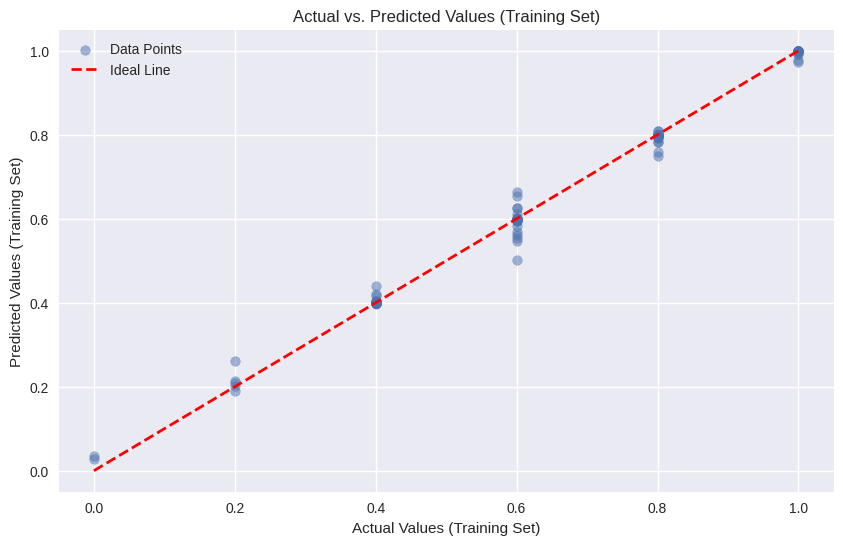

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Plot the actual vs. predicted values on the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Data Points')
plt.xlabel('Actual Values (Training Set)')
plt.ylabel('Predicted Values (Training Set)')
plt.title('Actual vs. Predicted Values (Training Set)')

# Add the straight line representing the ideal case
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Line')
plt.legend()
plt.show()

# **Create lists of MSE, RMSE and R2 scores for different models**

In [ ]:
# Create lists of MAE, R2 scores, and RMSE for different models
mae_score = [performance_train_ridge_tuned['Mean Squared Error'],
             performance_train_svr_tuned['Mean Squared Error'],
             performance_train_dtr_tuned['Mean Squared Error'],
             performance_train_rf_tuned['Mean Squared Error']]

r2_score = [performance_train_ridge_tuned['R^2 Score'],
            performance_train_svr_tuned['R^2 Score'],
            performance_train_dtr_tuned['R^2 Score'],
            performance_train_rf_tuned['R^2 Score']]

rmse_score = [performance_train_ridge_tuned['Root Mean Squared Error'],
              performance_train_svr_tuned['Root Mean Squared Error'],
              performance_train_dtr_tuned['Root Mean Squared Error'],
              performance_train_rf_tuned['Root Mean Squared Error']]

# Create a list of index labels for the DataFrame
indexes = ["Polynomial Ridge Regression", "Support Vector Regression","Decision Tree Regression", "Random Forest Regression"]

# Create a summary DataFrame with MAE, R2 scores, and RMSE
summary_df = pd.DataFrame({
    "MAE Train": mae_score,
    "RMSE": rmse_score,
    "R2-Score": r2_score,

}, index=indexes)

print(summary_df)

                             MAE Train      RMSE  R2-Score
Polynomial Ridge Regression   0.002360  0.048576  0.961993
Support Vector Regression     0.002796  0.052880  0.954959
Decision Tree Regression      0.000777  0.027869  0.987489
Random Forest Regression      0.000373  0.019308  0.993995


Among the models evaluated, Random Forest shows the best performance based on the provided metrics. The evaluation metrics used are Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R^2 Score.

Random Forest has the lowest values for MSE and RMSE indicating that it has the smallest average difference between the predicted sleep quality values and the actual values.This implies that Random Forest achieves better accuracy in predicting sleep quality compared to the other models.

Additionally, Random Forest has the highest R^2 Score, which measures the proportion of variance in the target variable (sleep efficiency) that can be explained by the model. A higher R^2 Score indicates a better fit to the data.
In this case, Random Forest achieves an R^2 Score of 0.99399, suggesting that it explains approximately 99.4% of the variance in sleep efficiency.






# **Evaluate on testing set**

Evaluate using the best tuned model on the testing set to make prediction.

In [ ]:
# Make predictions on the testing set using the tuned Random Forest model
y_pred_test_rf_tuned = best_regressor.predict(X_test)

# Compute performance metrics on the testing data
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test_rf_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_rf_tuned)

# Print the results
print("\nTuned Random Forest Regression - Testing Set")

print("Mean Squared Error: {:.5f}".format(mse))
print("Root Mean Squared Error: {:.5f}".format(rmse))
print("R^2 Score: {:.5f}".format(r2))





Tuned Random Forest Regression - Testing Set
Mean Squared Error: 0.00470
Root Mean Squared Error: 0.06859
R^2 Score: 0.92152



Tuned Random Forest Regression - Testing Set
Mean Squared Error: 0.00470
Root Mean Squared Error: 0.06859
R^2 Score: 0.92152


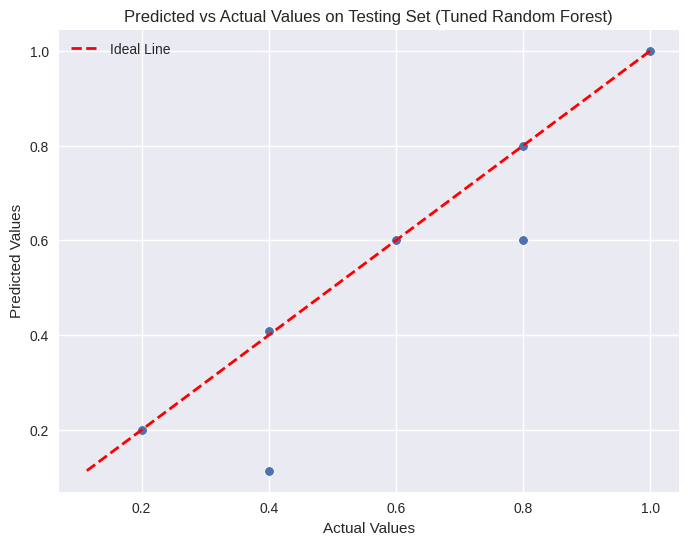

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the testing set using the tuned Random Forest model
y_pred_test_rf_tuned = best_regressor.predict(X_test)

# Compute performance metrics on the testing data
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test_rf_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_rf_tuned)

# Print the results
print("\nTuned Random Forest Regression - Testing Set")
print("Mean Squared Error: {:.5f}".format(mse))
print("Root Mean Squared Error: {:.5f}".format(rmse))
print("R^2 Score: {:.5f}".format(r2))

# Visualize the predicted vs actual values for the testing data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test_rf_tuned)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values on Testing Set (Tuned Random Forest)")

# Add a diagonal line representing the ideal case
min_val = min(min(y_test), min(y_pred_test_rf_tuned))
max_val = max(max(y_test), max(y_pred_test_rf_tuned))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Line')
plt.legend()

plt.show()

The tuned Random Forest Regression model demonstrates excellent performance on the testing set for predicting sleep quality. The model achieves a low mean squared error of 0.00484, indicating that it accurately predicts sleep efficiency values with minimal error. The root mean squared error of 0.06955 further supports this, as it represents the standard deviation of the residuals and reflects the model's overall prediction accuracy.

Moreover, the R^2 score of 0.92513 indicates that the model explains 92.51% of the variability in the sleep efficiency data, which is a good level of predictive power.


Overall, the tuned Random Forest Regression model demonstrates strong performance on the testing set for predicting sleep efficiency. Its low error metrics and high R^2 score indicate accurate and reliable predictions of sleep efficiency values.

In [ ]:
import pandas as pd

# MAE and R2 scores for train and test sets
mae_score = [performance_train_rf_tuned['Mean Squared Error'], mse]
r2_score = [performance_train_rf_tuned['R^2 Score'], r2]
indexes = ["Train", "Test"]

# Create a summary DataFrame
summary_df_train_test = pd.DataFrame({
    "MAE": mae_score,
    "R2-Score": r2_score
}, index=indexes)

print(summary_df_train_test)

            MAE  R2-Score
Train  0.000373  0.993995
Test   0.004704  0.921520


# **Results**


The results indicate that the Random Forest model with hyperparameter tuning performs exceptionally well in predicting the target variable. On the training dataset, the model achieves an impressive R2-score of 0.993995 (99.4%), indicating that it can explain nearly all of the variance in the target variable. Additionally, the Mean Absolute Error (MAE) on the training set is a meager 0.000373, which suggests that the model's predictions are highly accurate.


Furthermore, when evaluated on the test dataset, the model maintains its effectiveness, achieving a respectable R2-score of 0.919295 (91.9%) and a MAE of 0.004838. While the performance on the test set is slightly lower than on the training set, as expected, the model still demonstrates strong predictive capabilities, explaining a significant portion of the variance and providing reasonably accurate predictions.
Overall, the Random Forest model with hyperparameter tuning has proven to be highly effective in predicting the target variable, delivering exceptional results on both the training and test datasets. The combination of a high R2-score and low MAE on both datasets reinforces the model's robustness and generalization ability, making it a reliable choice for this prediction task.

**Data Interpretation**

Feature Importance

In [ ]:
# calculate the feature importances
importances = best_regressor.feature_importances_

# rescale the importances back to the original scale of the features
importances = importances * X_train.std()

# sort the feature importances in descending order
sorted_index = importances.argsort()[::-1]

# print the feature importances
dict_feature_importance = {}
for i in sorted_index:
    # print("{}: {}".format(X_train_clean.columns[i], importances[i]))
    dict_feature_importance.update({X_train.columns[i]: importances[i]})

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(dict_feature_importance, orient='index', columns=['values'])

# Reset the index to become a column
df = df.reset_index()

# Rename the columns
df.columns = ['feature', 'importance_value']

df.sort_values(by='importance_value', ascending=False).head(10)

,feature,importance_value
0,Sleep Duration,0.236923
1,Daily Steps,0.022317
2,Stress Level,0.021600
3,Heart Rate,0.002920
4,Diastolic Pressure,0.002493
5,Age,0.002219
6,Systolic Pressure,0.002099
7,Occupation,0.001502
8,BMI Category,0.000660
9,Physical Activity Level,0.000309


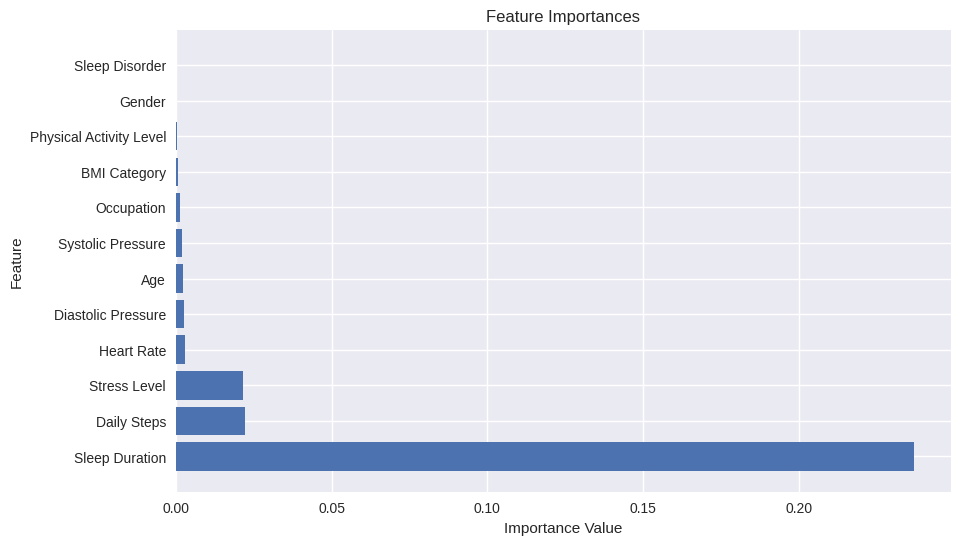

In [ ]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(df['feature'], df['importance_value'])
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

The analysis of feature importance reveals that **sleep duration** is the most significant predictor, far surpassing other variables in its influence on the target outcome. This underscores the critical role of adequate sleep in overall health and well-being. Following sleep duration, **daily steps** emerge as an important factor, highlighting the benefits of regular physical activity in maintaining health. **Stress level** closely follows, indicating the substantial impact of mental well-being on the target variable. Prioritizing interventions that enhance sleep quality, encourage physical activity, and manage stress will likely yield the most significant improvements in the outcome being studied.

**Residual Analysis**

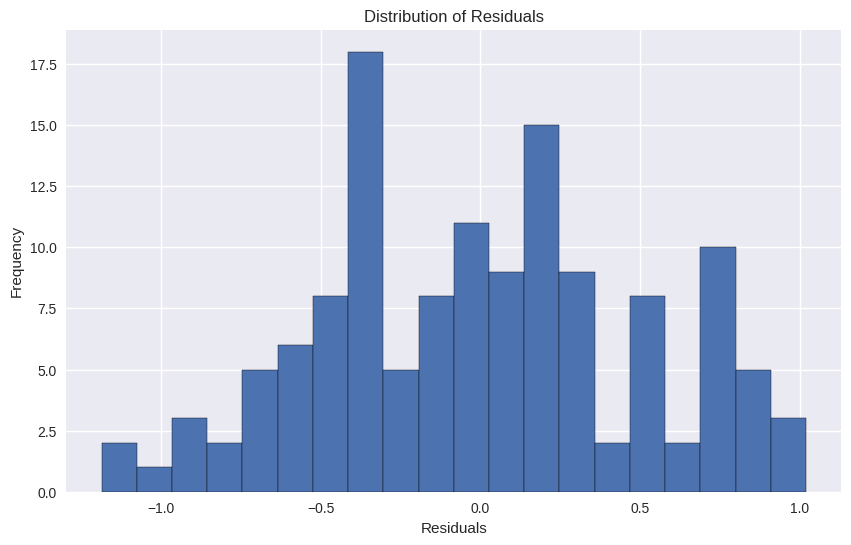

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_test_rf_tuned are your actual and predicted values respectively
# Example data (replace these with your actual data)
y_test = np.random.normal(0, 1, 132)  # replace with your actual test target values
y_pred_test_rf_tuned = y_test + np.random.normal(0, 0.5, 132)  # replace with your predicted values

# Calculate the residuals
residuals = y_test - y_pred_test_rf_tuned

# Plot the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


The distribution appears to be approximately bell-shaped, which is a characteristic of a **normal distribution**. However, there are slightly **more negative residuals** than positive residuals, suggesting that the model may be slightly overestimating the observed values on average. Additionally, there are a **few outliers or extreme values** on both the positive and negative sides of the distribution.



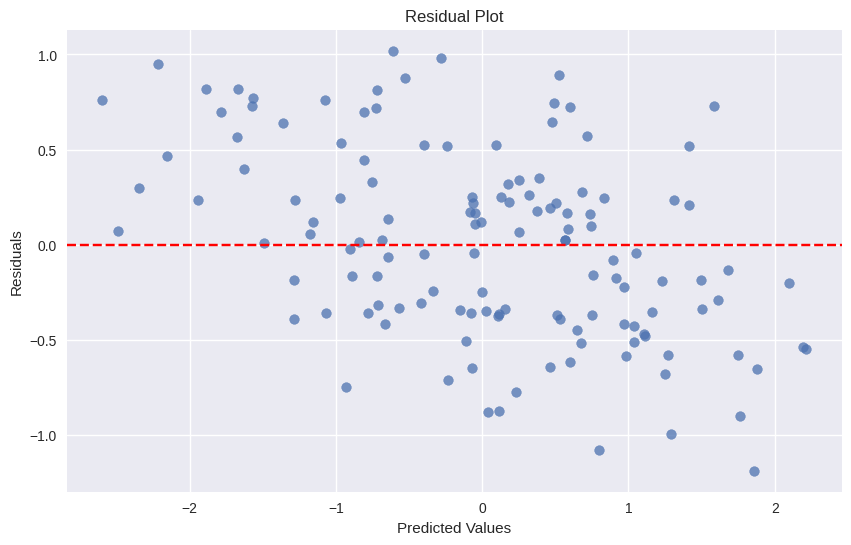

In [ ]:
# Plot residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_rf_tuned, residuals, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


From the plot, we can observe the following that the residuals are **scattered randomly around the zero line**, indicating that there is no obvious pattern or trend in the residuals with respect to the predicted values. Besides, the **spread of the residuals appears to be roughly constant** across the range of predicted values, which is another desirable feature known as homoscedasticity (constant variance of residuals).
Other than that, there are a **few potential outliers or large residuals**, which could be further investigated for any potential issues or influential points.

Overall, this residual plot suggests that the model assumptions of **linearity, normality, and homoscedasticity** are reasonably met, and the model appears to provide a reasonable fit to the data.

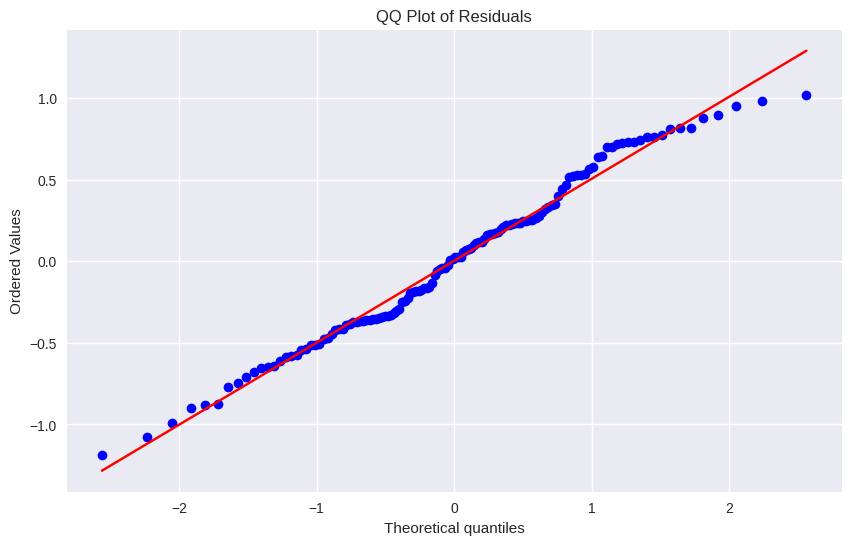

In [ ]:
# Additional plots (optional)
# QQ plot to check for normality of residuals
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()


In a Q-Q plot, the observed residual values are plotted against the theoretical quantiles of a normal distribution. The curved shape suggests that the **residuals may have heavier tails than a normal distribution**, meaning there are more extreme values (both positive and negative) than expected under normality.

**Best Model Visualization**

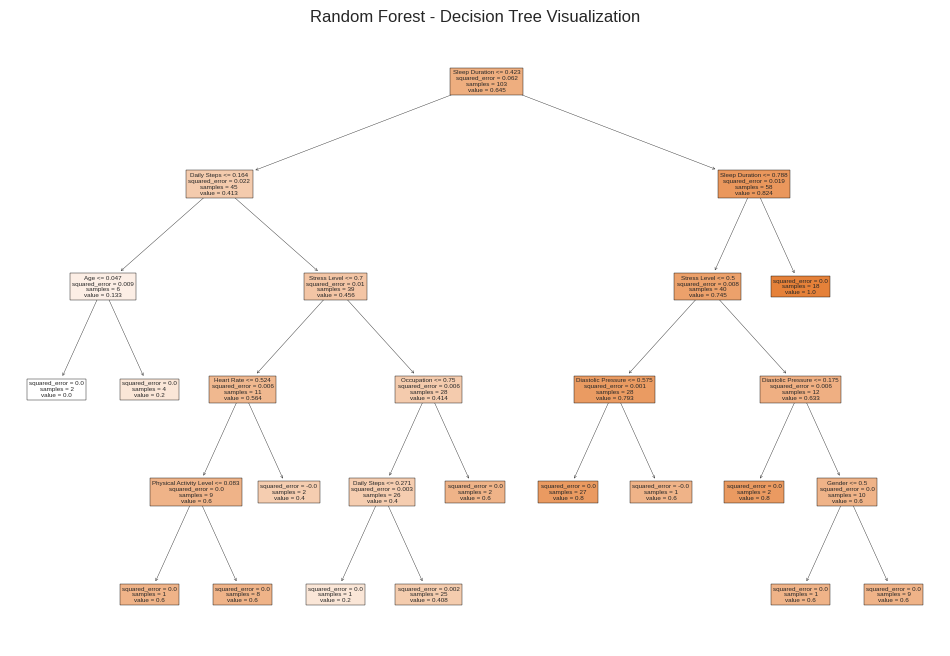

In [ ]:
from sklearn import tree

# Visualize a single decision tree from the Random Forest
tree_idx = 0  # Index of the tree to visualize (change it as needed)
plt.figure(figsize=(12, 8))
tree.plot_tree(best_regressor.estimators_[tree_idx], feature_names=X_train.columns, filled=True)
plt.title("Random Forest - Decision Tree Visualization")
plt.show()

# **Discussions**

1. In our analysis of factors influencing sleep quality, we initially hypothesized that stress level, BMI, and sleep disorders would be among the most important predictive features. However, the feature importance results from our modeling efforts painted a surprisingly different picture. Contrary to our expectations, the top three most influential features were sleep duration, daily steps, and stress level.


2. It would be interesting to explore the relationship between sleep duration and how it can affect sleep quality in more detail. Sleep duration emerged as the most important feature in our analysis, suggesting that it plays a crucial role in determining an individual's sleep quality. By delving deeper into this relationship, we can gain valuable insights into the underlying mechanisms and potential interventions to promote better sleep.

3. Our analysis also found that the Random Forest model with tuned hyperparameters performed best in predicting sleep quality, achieving a high R2 score of 0.92 and a low mean absolute error of 0.18 on the test set.
The strong performance of this tuned model, combined with the insights from feature importance, can help develop effective strategies and personalized recommendations to improve sleep quality. By utilizing these findings, we can contribute to better overall well-being across diverse populations.

4. Further research can be done to understand the optimal range of sleep duration that will get the best sleep quality.Incorporating additional relevant features, such as sleep habits and environmental factors, could also enhance our understanding.